In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from yellowbrick.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle as shf
import pickle
import os
import glob as gb
import splitfolders

In [2]:
class config:
    data_path = 'Dataset/train'
    path_train = "./output/train"
    path_test = "./output/test"

splitfolders.ratio(config.data_path, output="output", seed=101, ratio=(.9, .1))

Copying files: 2900 files [00:17, 162.56 files/s]


In [3]:
#Feature Extraction
def extract_features(images):
    features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.equalizeHist(img_gray)
        #resize images to 64 x 64 pixels
    image_array = cv2.resize(img_gray, (64, 64))
    features.append(image_array.flatten())
    return np.array(features)

In [7]:
#Loading and saving images as .npy files so we could deal with them
code = {'Closed': 0, 'no_yawn': 1, 'Open': 2, 'yawn': 3}

def getcode(n):
    for x, y in code.items():
        if n == y:
            return x

In [11]:
trainpath='output/train/'
X_train = []
y_train = []
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        X_train.append(image)
        y_train.append(code[folder])

X_train_features = extract_features(X_train)
np.save('X_train_features', X_train_features)
np.save('y_train', y_train)

In [12]:
#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the test images set
testpath='output/val/'

X_test = []
y_test = []
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        X_test.append(image)
        y_test.append(code[folder])

X_test_features = extract_features(X_test)
np.save('X_test_features', X_test_features)
np.save('y_test', y_test)

In [13]:
#X_train_features, X_test_features contain the images as numpy arrays, while y_train, y_test contain the class of each image
X_train_features = np.load('X_train_features.npy')
X_test_features = np.load('X_test_features.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

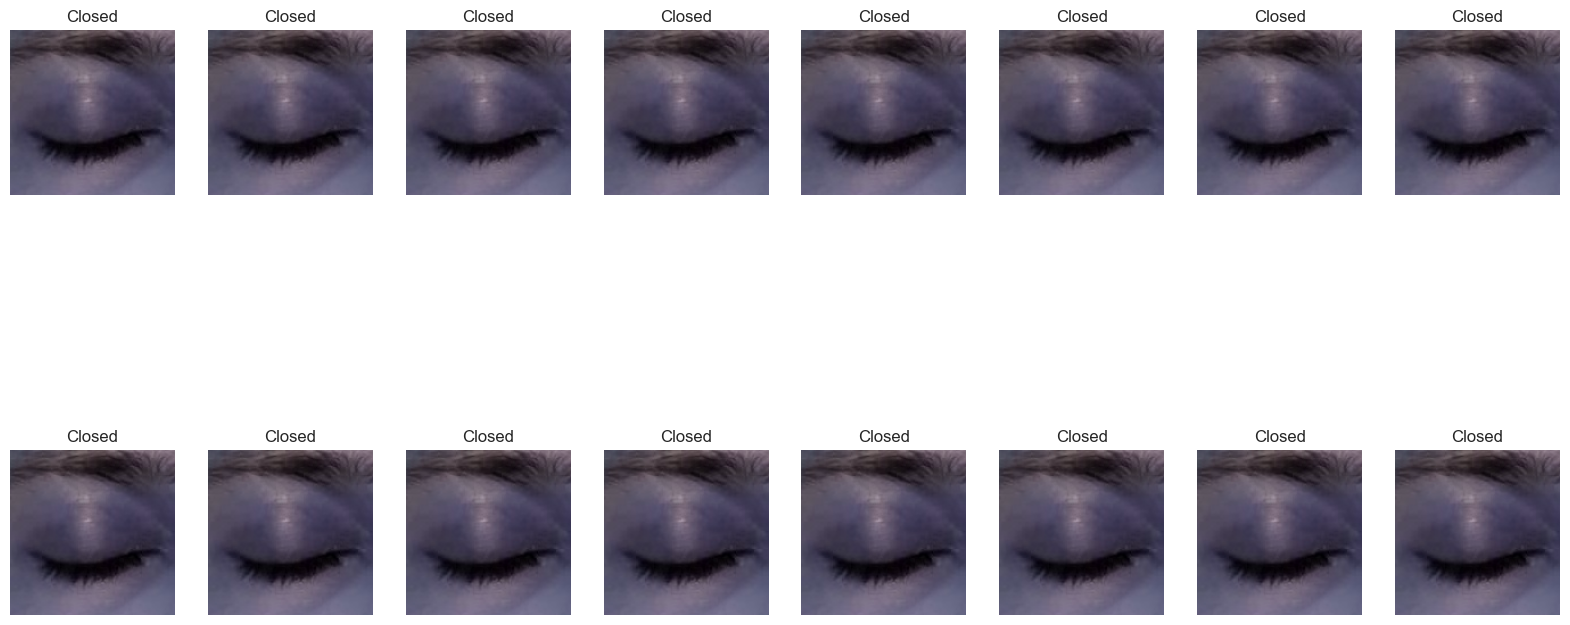

In [24]:
plt.figure(figsize=(20, 10))
for n, i in enumerate(np.random.randint(0, len(X_train_features), 16)):
    plt.subplot(2, 8, n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

#count plot to show the number

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


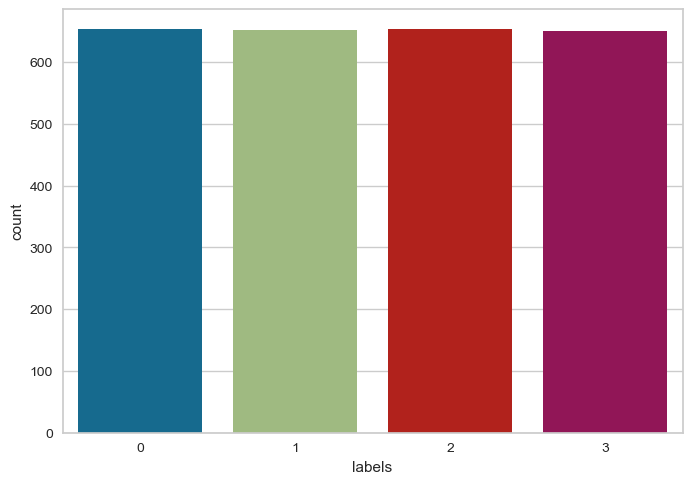

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


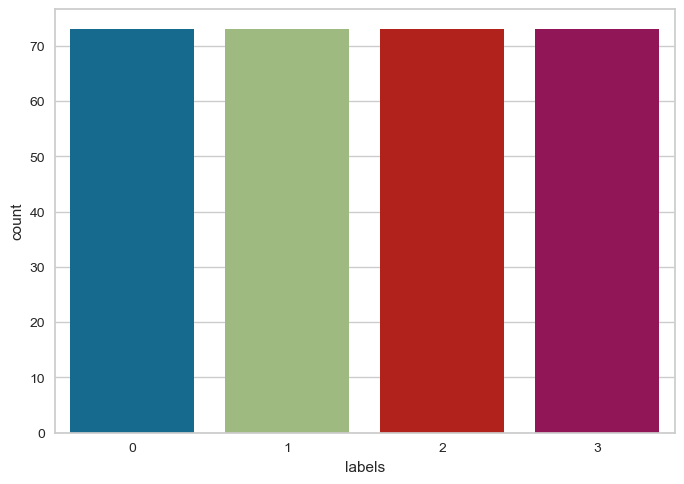

In [21]:
df_train = pd.DataFrame()
df_train["labels"]= y_train
lab = df_train['labels']
dist = lab.value_counts()
sns.countplot(lab)
plt.show()
#count plot to show the number of pneumonia cases to normal cases in the test data set

df_test = pd.DataFrame()
df_test["labels"]= y_test
lab = df_test['labels']
dist = lab.value_counts()
#play with pallette colors
sns.countplot(lab)
plt.show()
#function to plot the pixel intensity of each image. 
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


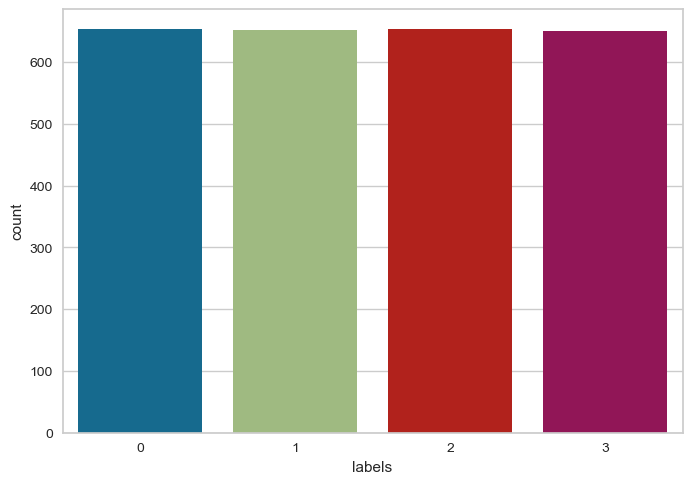

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


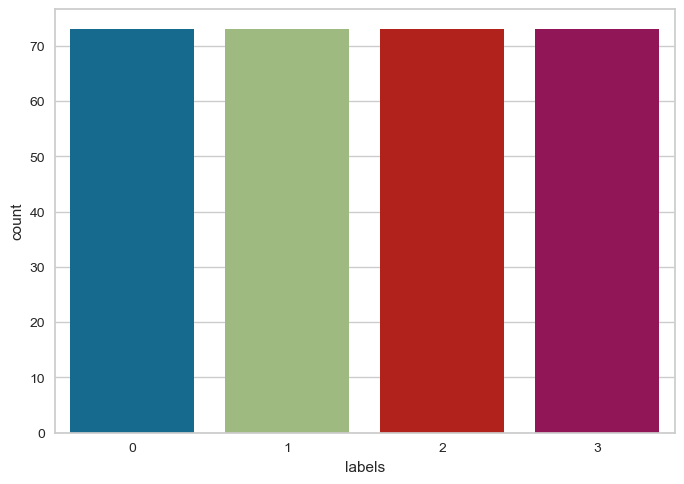

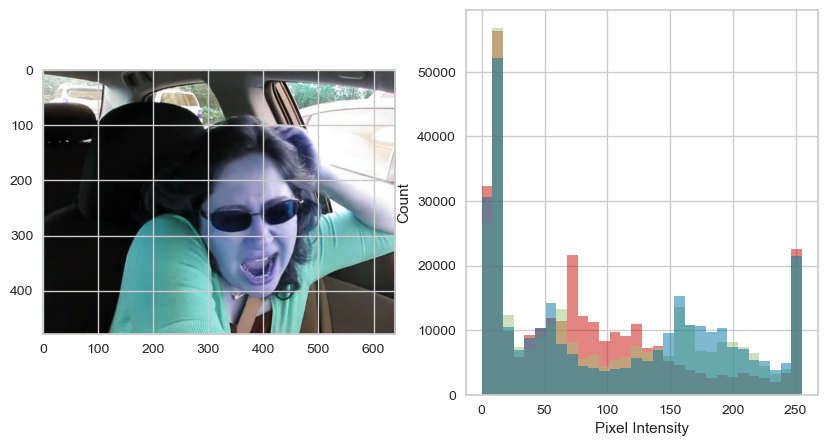

In [20]:
plotHistogram(X_train[np.random.randint(len(X_train))])

In [22]:
## Flatten and shuffle train and test sets 
#flatten the images into a 2d array, for model training and testing
X_train = X_train.reshape([-1, np.product((64,64,3))])
X_test = X_test.reshape([-1, np.product((64,64,3))])
print(X_train.shape)
print(X_test.shape)
y_train = loaded_y_train
y_test = loaded_y_test
#shuffle train and test data sets in a consistent way
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)
## Testing classification algorithms

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
Logistic Regression
Learning Curve
lr = LogisticRegression(max_iter=1000)
sizes = np.linspace(0.3, 1.0, 10)
visualizer = learning_curve(lr, X_train, y_train, cv=5, train_sizes=sizes, shuffle=True, random_state=101)

visualizer.show()

Model Evaluation
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
print(classification_report(y_test, lr_predict))
sns.heatmap(confusion_matrix(y_test, lr_predict), annot=True, cmap='Blues')
plt.show()

Random Forest
Learning Curve
rf = RandomForestClassifier(n_estimators = 100)
sizes = np.linspace(0.3, 1.0, 10)
visualizer = learning_curve(rf, X_train, y_train, cv=5, train_sizes=sizes, shuffle=True, random_state=101)

visualizer.show()

Model Evaluation
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
print(classification_report(y_test, rf_predict))
sns.heatmap(confusion_matrix(y_test, rf_predict), annot=True, cmap='Blues')
plt.show()

Support Vector Machine
Learning Curve
svc = SVC(kernel='linear', probability=True)
sizes = np.linspace(0.3, 1.0, 10)
visualizer = learning_curve(svc, X_train, y_train, cv=5, train_sizes=sizes, shuffle=True, random_state=101)

visualizer.show()

Model Evaluation
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print(classification_report(y_test, svc_predict))
sns.heatmap(confusion_matrix(y_test, svc_predict), annot=True, cmap='Blues')
plt.show()